<h1> Logistic Regression </h1>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

df=pd.read_csv('C:\\Users\\WIN10\\Downloads\\18k_Projects0.csv')


del df['Id']
del df['Name']
del df['Url']
del df['Location']
del df['Pledged']
del df['Creator']
del df['Category']
del df['Updates']
del df['Start']
del df['End']
del df['Latitude']
del df['Longitude']
del df['Start Timestamp (UTC)']
del df['End Timestamp (UTC)']
del df['Creator Bio']
del df['Creator Website']
df.head()

C:\Users\WIN10\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,17,20,22,23,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,State,Currency,Top Category,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),# FAQs
0,failed,USD,Art,0,9,20000,2,30,Yes,272.0,70,Yes,1.0,0.0,0.0,2,297,153.0,0.0
1,failed,USD,Film & Video,0,8,3000,5,33,Yes,573.0,57,Yes,1.0,4.0,0.0,0,276,98.0,0.0
2,failed,USD,Fashion,2,17,5000,62,30,No,NaN,158,No,2.0,2.0,0.0,12,1049,66.0,2.0
3,failed,USD,Publishing,0,4,5000,5,60,Yes,1285.0,2,Yes,1.0,2.0,0.0,0,309,169.0,0.0
4,failed,USD,Publishing,0,12,12000,16,30,Yes,969.0,411,Yes,1.0,0.0,0.0,6,1636,216.0,0.0


<h2> One-Hot-Encoding </h2>

<h3>non-numeric values -> numeric values</h3>

In [12]:
df=pd.get_dummies(df,columns=['State', 'Currency','Top Category','Facebook Connected','Has Video'],
                 drop_first=True)
df.head()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
0,0,9,20000,2,30,272.0,70,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
1,0,8,3000,5,33,573.0,57,1.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,2,17,5000,62,30,NaN,158,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,5000,5,60,1285.0,2,1.0,2.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,0,12,12000,16,30,969.0,411,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1


In [13]:
df.isnull().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5849
Facebook Shares                      0
Creator - # Projects Created         1
Creator - # Projects Backed       4242
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               1
State_successful                     0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance                   0
Top Category_Design                  0
Top Category_Fashion                 0
Top Category_Film & Video

<h2>연관성 파악</h2>
<h4>0에 가까울수록 높음, 중간 값으로 채운다.</h4>

In [17]:
df['State_successful'].corr(df['Facebook Friends'])

0.15951807774677765

In [19]:
df['State_successful'].corr(df['Creator - # Projects Backed'])

0.1062217510613561

In [20]:
df['State_successful'].corr(df['# Videos'])

0.057044213068048404

In [21]:
df['State_successful'].corr(df['# FAQs'])

0.1192366008621642

In [22]:
df['State_successful'].corr(df['# Videos'])

0.057044213068048404

In [23]:
df['State_successful'].corr(df['Creator - # Projects Created'])


0.07323209977485304

In [24]:
df.describe()

,Comments,Rewards,Goal,Facebook Friends,Creator - # Projects Created,Creator - # Projects Backed,# Videos,# Images,# Words (Description),# Words (Risks and Challenges),...,Top Category_Food,Top Category_Games,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_Yes,Has Video_Yes
count,18140.000000,18140.000000,1.814000e+04,12291.000000,18139.000000,13898.000000,18039.000000,18140.000000,18140.000000,18039.000000,...,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000,18140.000000
mean,34.247299,10.316538,2.653063e+04,694.221381,1.520150,5.149806,0.226953,6.925193,667.994267,130.329841,...,0.061136,0.089471,0.004024,0.150606,0.029658,0.113065,0.054355,0.035667,0.677508,0.829658
std,539.190862,37.514416,7.584292e+05,783.771642,2.540676,20.352008,0.882712,10.933761,582.135616,96.998366,...,0.239586,0.285430,0.063311,0.357675,0.169647,0.316681,0.226723,0.185464,0.467443,0.375943
min,0.000000,2.000000,1.000000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000e+03,216.500000,1.000000,0.000000,0.000000,0.000000,276.000000,69.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,9.000000,5.000000e+03,453.000000,1.000000,1.000000,0.000000,3.000000,490.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,12.000000,1.500000e+04,860.000000,1.000000,4.000000,0.000000,10.000000,871.250000,163.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,30341.000000,5000.000000,1.000000e+08,4885.000000,111.000000,1205.000000,24.000000,511.000000,5152.000000,1888.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>중간 값</h3>

C:\Users\WIN10\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Facebook Friends', ylabel='Density'>

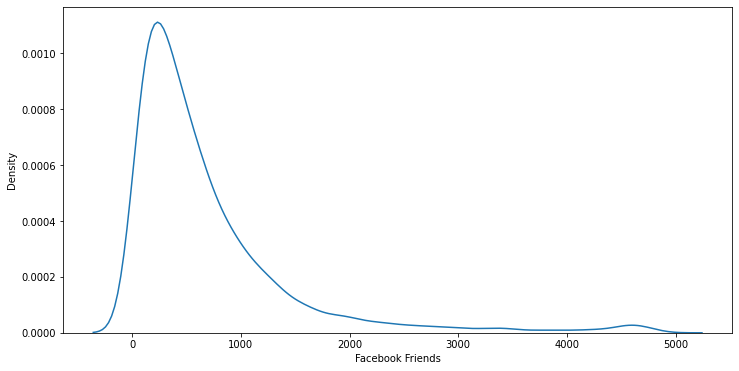

In [25]:
plt.figure(figsize=(12,6))    #12: 가로, 6: 세로 
sns.distplot(df['Facebook Friends'],kde=True, hist=0)

<h4> 한쪽으로 치우침 : 결과 값에 악영향을 줄 수 있다.</h4>

C:\Users\WIN10\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Creator - # Projects Backed', ylabel='Density'>

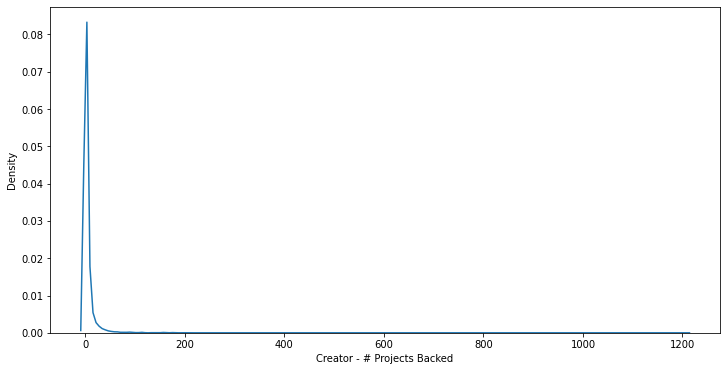

In [31]:
plt.figure(figsize=(12,6))    #12: 가로, 6: 세로 
sns.distplot(df['Creator - # Projects Backed'],kde=True, hist=0)

<h4>넓지 않고 한쪽에 집중되어있으므로 중간값으로 사용해도 괜찮다.</h4>

In [32]:
df['Creator - # Projects Backed'].fillna(df['Creator - # Projects Backed'].mean(),inplace=True)
df.dropna(axis=0, how='any',thresh=None, subset =  None, inplace =True)
df.shape

(12215, 36)

In [46]:
X=df.drop('State_successful',axis=1) #나머지 35개
y=df['State_successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,shuffle=True)

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)  #훈련시킴
model_predict = model.predict(X_test)  #결과값을 예측
print(confusion_matrix(y_test, model_predict)) #결과값 예측과 실제값 비교

[[1614  215]
 [ 220 1616]]


<h2>정확도</h2>

<h4> 169 : false positive (successful하지 않은데 successful하다고 잘못판단)</h4>

<h4> 230 : false negative (successful한 것을 successful하지 않다고 잘못판단)</h4>

In [47]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1829
           1       0.88      0.88      0.88      1836

    accuracy                           0.88      3665
   macro avg       0.88      0.88      0.88      3665
weighted avg       0.88      0.88      0.88      3665



<h4> 0 : 실패   /   1 : 성공 , 정확도 : 88% </h4>

<h2>새로운 입력으로 TEST</h2>

In [37]:
cols = df.columns.tolist()
print("new_project=[")
for item in cols:
    print("\t0, "+"#"+item)
print("]")

new_project=[
	0, #Comments
	0, #Rewards
	0, #Goal
	0, #Backers
	0, #Duration in Days
	0, #Facebook Friends
	0, #Facebook Shares
	0, #Creator - # Projects Created
	0, #Creator - # Projects Backed
	0, ## Videos
	0, ## Images
	0, ## Words (Description)
	0, ## Words (Risks and Challenges)
	0, ## FAQs
	0, #State_successful
	0, #Currency_CAD
	0, #Currency_EUR
	0, #Currency_GBP
	0, #Currency_NZD
	0, #Currency_USD
	0, #Top Category_Comics
	0, #Top Category_Crafts
	0, #Top Category_Dance
	0, #Top Category_Design
	0, #Top Category_Fashion
	0, #Top Category_Film & Video
	0, #Top Category_Food
	0, #Top Category_Games
	0, #Top Category_Journalism
	0, #Top Category_Music
	0, #Top Category_Photography
	0, #Top Category_Publishing
	0, #Top Category_Technology
	0, #Top Category_Theater
	0, #Facebook Connected_Yes
	0, #Has Video_Yes
]


In [48]:
new_project=[
	0, #Comments
	9, #Rewards
	2500, #Goal
	157, #Backers
	31, #Duration in Days
	319, #Facebook Friends
	110, #Facebook Shares
	1, #Creator - # Projects Created
	0, #Creator - # Projects Backed
	0, ## Videos
	12, ## Images
	872, ## Words (Description)
	65, ## Words (Risks and Challenges)
	0, ## FAQs
	1, #Currency_CAD
	0, #Currency_EUR 
	0, #Currency_GBP
	0, #Currency_NZD
	0, #Currency_USD
	0, #Top Category_Comics
	0, #Top Category_Crafts
	0, #Top Category_Dance
	0, #Top Category_Design
	0, #Top Category_Fashion
	1, #Top Category_Film & Video
	0, #Top Category_Food
	0, #Top Category_Games
	0, #Top Category_Journalism
	0, #Top Category_Music
	0, #Top Category_Photography
	0, #Top Category_Publishing
	0, #Top Category_Technology
	0, #Top Category_Theater
	0, #Facebook Connected_Yes
	1, #Has Video_Yes
]

new_pred=model.predict([new_project])
new_pred

array([1], dtype=uint8)